## Deep Learning Dataset 4

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import pandas as np

In [3]:
import os
import scipy.io as sio

In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
#import python libraries
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,BatchNormalization
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import Dropout
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()
tf.disable_v2_behavior()
import operator as op
from functools import reduce
from tqdm import tnrange,tqdm_notebook
import operator as op
from functools import reduce
import os
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_

In [5]:
from keras.utils import to_categorical

In [6]:
## Importing required libraries
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()
tf.disable_v2_behavior()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
d_len = 100000
d_file_len = 100000
num_files = 1000

In [8]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [9]:
def concatDataTrigger(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"trigger_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

### Load Data

In [10]:
df_data1 = pd.read_csv('../DataFactory/FixedPlaintext/TS4_A.csv')

In [11]:
df_data1['label'] = 0

In [12]:
df_data2 = pd.read_csv('../DataFactory/FixedPlaintext/TS4_B.csv')

In [13]:
df_data2['label'] = 1

In [14]:
len(df_data1)

1500000

### Create Label

In [15]:
df_label1 = df_data1['label']
df_data1 = df_data1.drop(['label'],axis=1)

In [16]:
df_label2 = df_data2['label']
df_data2 = df_data2.drop(['label'],axis=1)

In [17]:
df_data = pd.concat([df_data1,df_data2])
df_data = df_data.reset_index()
df_data = df_data.to_numpy()
df_data = np.delete(df_data, 0, axis=1)

In [18]:
len(df_data)

3000000

In [19]:
df_label = pd.concat([df_label1,df_label2])
df_label = df_label.reset_index()
df_label = df_label.to_numpy()

In [20]:
df_label = df_label[:,-1]

### Split Label

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [23]:
y_train = to_categorical(y_train,num_classes=2)

In [24]:
y_test = to_categorical(y_test,num_classes=2)

In [26]:
import numpy as np

In [27]:
X_train = np.array(X_train)

In [28]:
y_train = np.array(y_train)

In [31]:
X_test = np.array(X_test)

In [32]:
y_test = np.array(y_test)

In [33]:
from keras import backend as k

In [89]:
def createMLPModel():
    model = Sequential()
    model.add(Dense(120,input_dim=50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(90, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1/100000000, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])   
    
    return model

In [90]:
tmpModel = createMLPModel()

In [91]:
trainedModel = tmpModel.fit(x=[X_train[0:60000]],
                            y=y_train[0:60000],
                            batch_size=1000,
                            verbose=1,
                            epochs=30
                            )

Epoch 1/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.2901 - accuracy: 0.4999
Epoch 2/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2545 - accuracy: 0.5383
Epoch 3/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.2456 - accuracy: 0.5638
Epoch 4/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2406 - accuracy: 0.5814
Epoch 5/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.2365 - accuracy: 0.5983
Epoch 6/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.2332 - accuracy: 0.6110
Epoch 7/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2297 - accuracy: 0.6216
Epoch 8/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2263 - accuracy: 0.6331
Epoch 9/30
60000/60000 [==============================] - 1s 15us/step - loss: 0.2227 - accuracy: 0.6430
Epoch 10/30
60000/60000 [==============================

In [92]:
gradient = K.gradients(tmpModel.output[0],tmpModel.input)

In [93]:
iterate = K.function([tmpModel.input], [gradient])

In [94]:
grad = iterate(np.array(X_test[0:5000],dtype=np.float128))

In [95]:
grad[0][0][0]

array([-4.2289447e-09,  7.0880404e-09,  7.6311603e-11, -3.4420331e-09,
        2.5061928e-09,  1.8704425e-09,  6.5045040e-09,  4.3065138e-09,
        1.8328042e-09,  3.3697249e-09, -5.9199419e-09, -3.4675702e-09,
       -5.6618319e-09,  6.4958583e-10,  2.9767144e-09, -3.5203211e-09,
        4.5457510e-10,  9.9298070e-10, -1.9630433e-09,  1.2754630e-09,
       -3.1284095e-09,  3.9376294e-10, -2.0418173e-10,  1.0712946e-09,
       -6.9096959e-09,  5.1172955e-09, -1.0059573e-09,  5.5153744e-09,
        4.2400576e-09, -4.0066039e-09,  2.4216020e-09,  4.8763686e-09,
       -3.5971102e-09,  8.7350305e-09, -9.4456905e-09, -2.5649144e-10,
        3.4092944e-09, -5.0448734e-09, -1.9333461e-09,  2.6471099e-09,
        1.6111914e-09, -7.8651774e-10,  5.4730878e-09,  8.7657046e-09,
        4.5877542e-09,  4.5032098e-09,  4.4610018e-09, -8.8253560e-10,
        1.9166229e-09,  3.6236767e-09], dtype=float32)

In [96]:
grad

[[array([[-4.2289447e-09,  7.0880404e-09,  7.6311603e-11, ...,
          -8.8253560e-10,  1.9166229e-09,  3.6236767e-09],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)]]

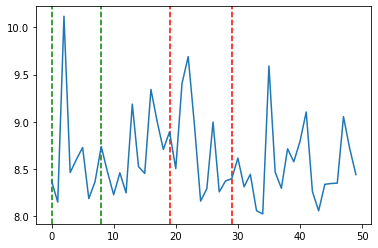

In [99]:
plt.axvline(x=19, color='r', linestyle='--')
plt.axvline(x=29, color='r', linestyle='--')
plt.axvline(x=8, color='g', linestyle='--')
plt.axvline(x=0, color='g', linestyle='--')
plt.plot(-np.log10(np.abs(grad[0][0][0])))
plt.show()

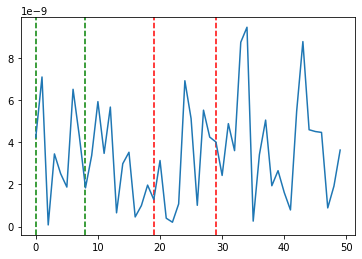

In [100]:
plt.axvline(x=19, color='r', linestyle='--')
plt.axvline(x=29, color='r', linestyle='--')
plt.axvline(x=8, color='g', linestyle='--')
plt.axvline(x=0, color='g', linestyle='--')
plt.plot(np.abs(grad[0][0][0]))
plt.show()